# A Dynamic Multi-Scale Voxel Flow Network for Video Prediction

![image](https://github.com/megvii-research/CVPR2023-DMVFN/raw/main/images/comparison.jpg)

This project is the official implement of [A Dynamic Multi-Scale Voxel Flow Network for Video Prediction](https://github.com/megvii-research/CVPR2023-DMVFN), we proposed a SOTA model for Video Prediction. Watch more demos in our [HomePage](https://huxiaotaostasy.github.io/DMVFN).

This colab notebook provides a simple method to test our model. Press start on the left of each following block.

In [ ]:
#@title Setup Repository
#@markdown Clone git repo and install requirements.
!git clone https://github.com/megvii-research/CVPR2023-DMVFN.git
import os
os.chdir("/content/CVPR2023-DMVFN/")
!pip3 install -r requirements.txt

In [ ]:
#@title Download pretrained weights
!mkdir pretrained_models
import os
os.chdir("./pretrained_models/")
!gdown --id 1jILbS8Gm4E5Xx4tDCPZh_7rId0eo8r9W
!gdown --id 1WrV30prRiS4hWOQBnVPUxdaTlp9XxmVK
!gdown --id 14_xQ3Yl3mO89hr28hbcQW3h63lLrcYY0
os.chdir("../")

In [ ]:
#@title Download test dataset [Optional]
#@markdown We use the validation set of cityscapes for testing. If you want to inference your own image, please ignore this block.
!mkdir ./data/
!mkdir ./data/cityscapes
!mkdir ./data/cityscapes/test
os.chdir("./data/cityscapes/test/")
!gdown "10zCt-uZFOqgF3tpdhluRqbs-4aScvGR4&confirm=t"
!unzip -q test.zip
!rm -rf test.zip
os.chdir("/content/CVPR2023-DMVFN/")

Downloading...
From: https://drive.google.com/uc?id=10zCt-uZFOqgF3tpdhluRqbs-4aScvGR4&confirm=t
To: /content/CVPR2023-DMVFN/data/cityscapes/test/test.zip
100% 5.22G/5.22G [00:30<00:00, 172MB/s]


In [ ]:
#@title Check if GPU resource is avaliable
!nvidia-smi

Tue Mar 21 05:28:26 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    26W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#@title Test on cityscapes [Optional]
#@markdown The first run may take a while to download the model files needed for eval metric calculation. 

#@markdown The whole process takes a few minutes.
!python3 ./scripts/test.py --val_datasets CityValDataset --load_path ./pretrained_models/dmvfn_city.pkl

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Loading model from: /usr/local/lib/python3.9/dist-packages/lpips/weights/v0.1/alex.pth
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behav

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


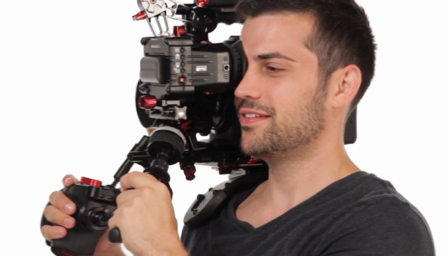

In [5]:
#@title Test on two images [Optional]

#@markdown Please upload your images to `CVPR2023-DMVFN/images/sample_img_0.png` and `CVPR2023-DMVFN/images/sample_img_1.png` at first.

#@markdown The output image will be output to `CVPR2023-DMVFN/images/pred.png`

#@markdown The first run may take a while to download the model files needed for eval metric calculation. 

#@markdown You can choose different pretrained weights to inference.

pretrained_weights = 'vimeo' #@param ['city', 'kitti', 'vimeo']
import os
os.environ['MODEL_PATH'] = './pretrained_models/dmvfn_' + pretrained_weights + '.pkl'

!python3 ./scripts/single_test.py \
--image_0_path ./images/sample_img_0.png \
--image_1_path ./images/sample_img_1.png \
--load_path $MODEL_PATH \
--output_dir ./images/pred.png

from IPython.display import Image
Image(filename='./images/pred.png') 
